# Compare methods notebook

In [1]:
import glob
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from modelproblem import ModelProblem
from result_classes import Result,MethodResults

In [2]:
prob_name = "Calcium_Oscillate"
methods = ["smc", "pmc"]#, "ptmcmc"]

mod_prob = ModelProblem(prob_name)
mod_prob.initialize()

grouped_results = [MethodResults(x) for x in methods]

for method, group_obj in zip(methods, grouped_results):
	result_dir = f"results/{prob_name}/{method}/"
	fnames = glob.glob(result_dir + "*.pkl")
	for fname in fnames:
		#print(fname)
		with open(fname, "rb") as f:
			results = pickle.load(f)
		result_obj = Result(results)
		group_obj.add_result(result_obj)
print(type(mod_prob.problem))		

<class 'pypesto.problem.base.Problem'>


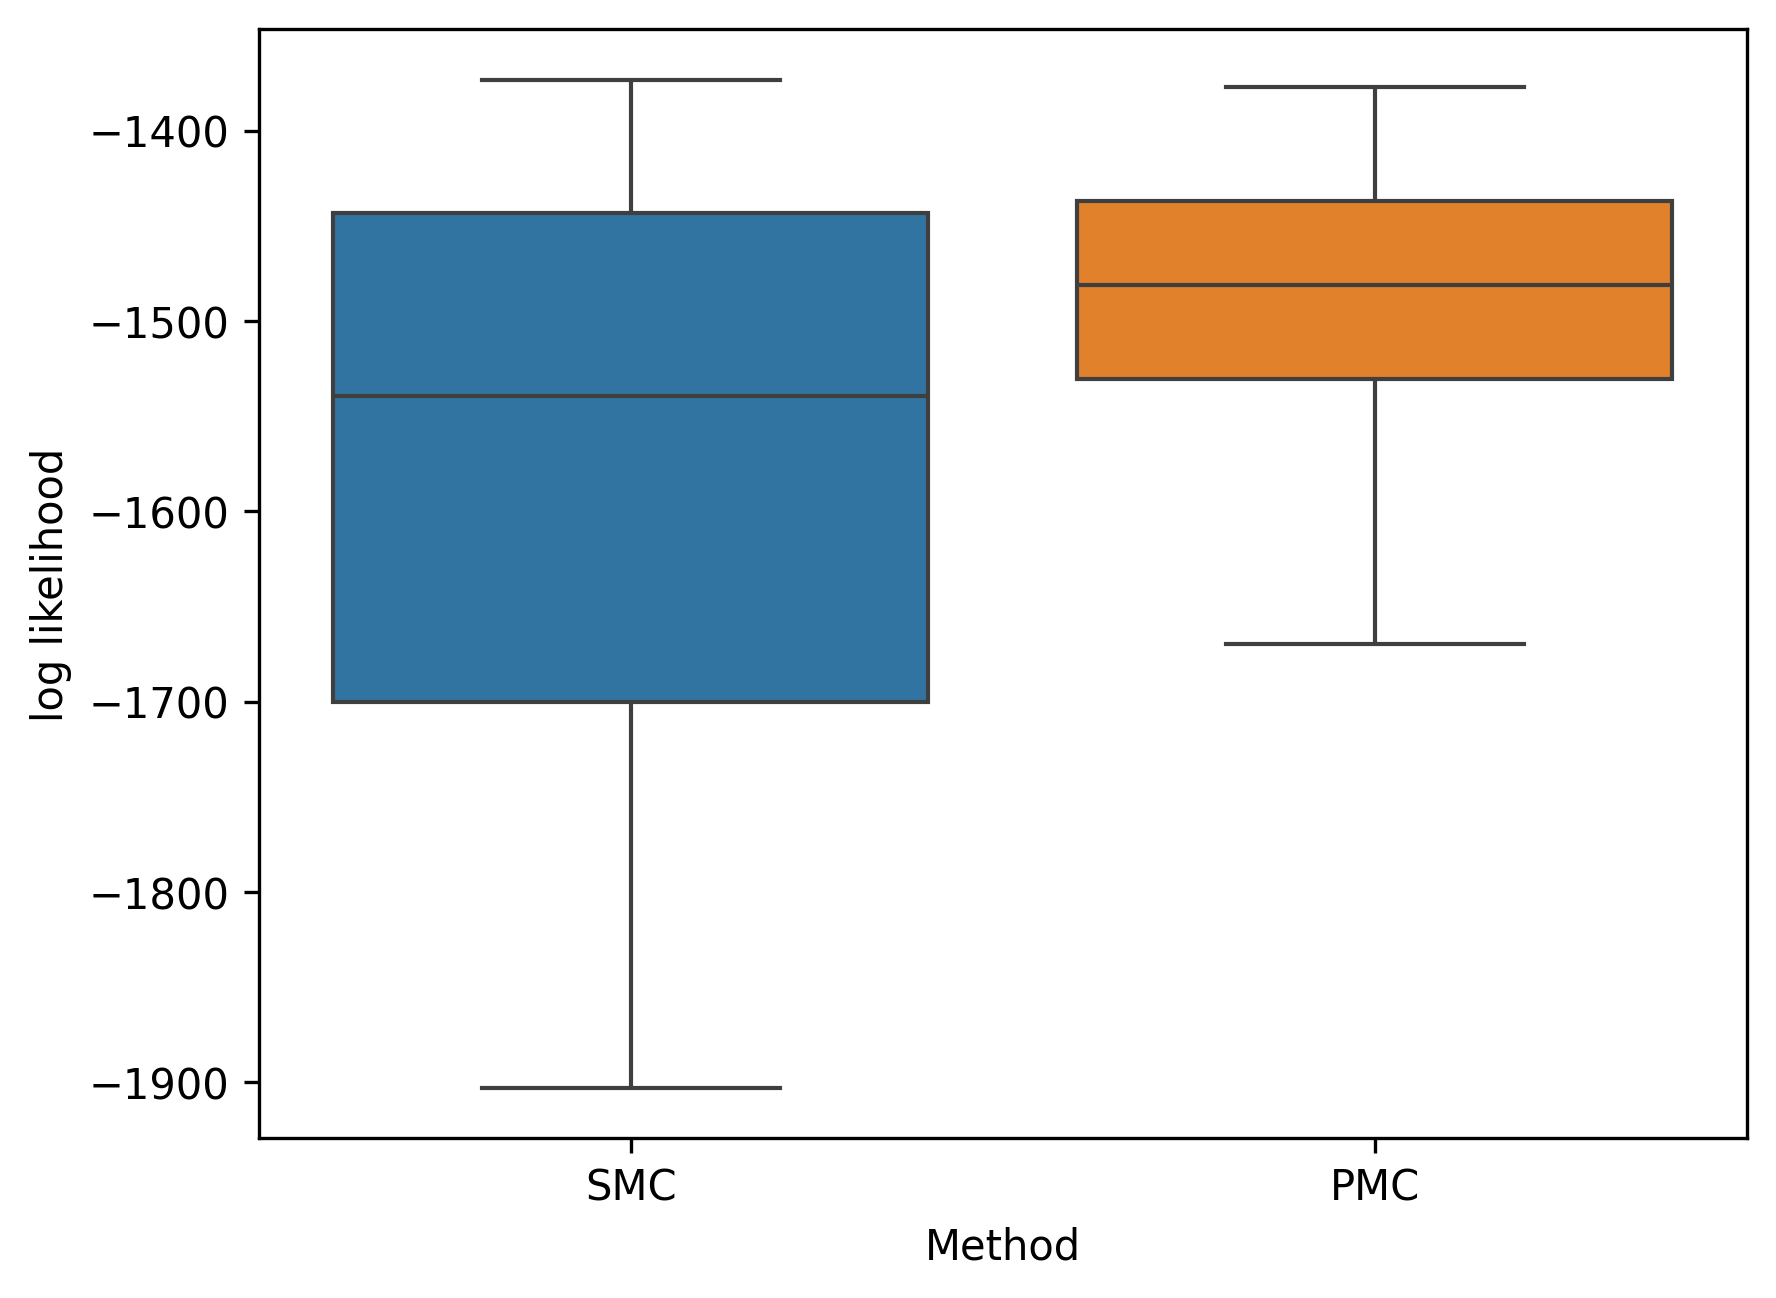

In [6]:
plt.figure(dpi=300)
llhs = np.array([x.get_llhs().flatten() for x in grouped_results])
#llhs[llhs<-20000] = -7500
llh_df = pd.DataFrame(columns=methods, data=llhs.T)
sns.boxplot(llh_df, showfliers=False)
plt.xticks(range(len(methods)), [x.abbr for x in grouped_results])
plt.xlabel("Method"); plt.ylabel("log likelihood");

MAX NUM FUNC CALLS: 6194000


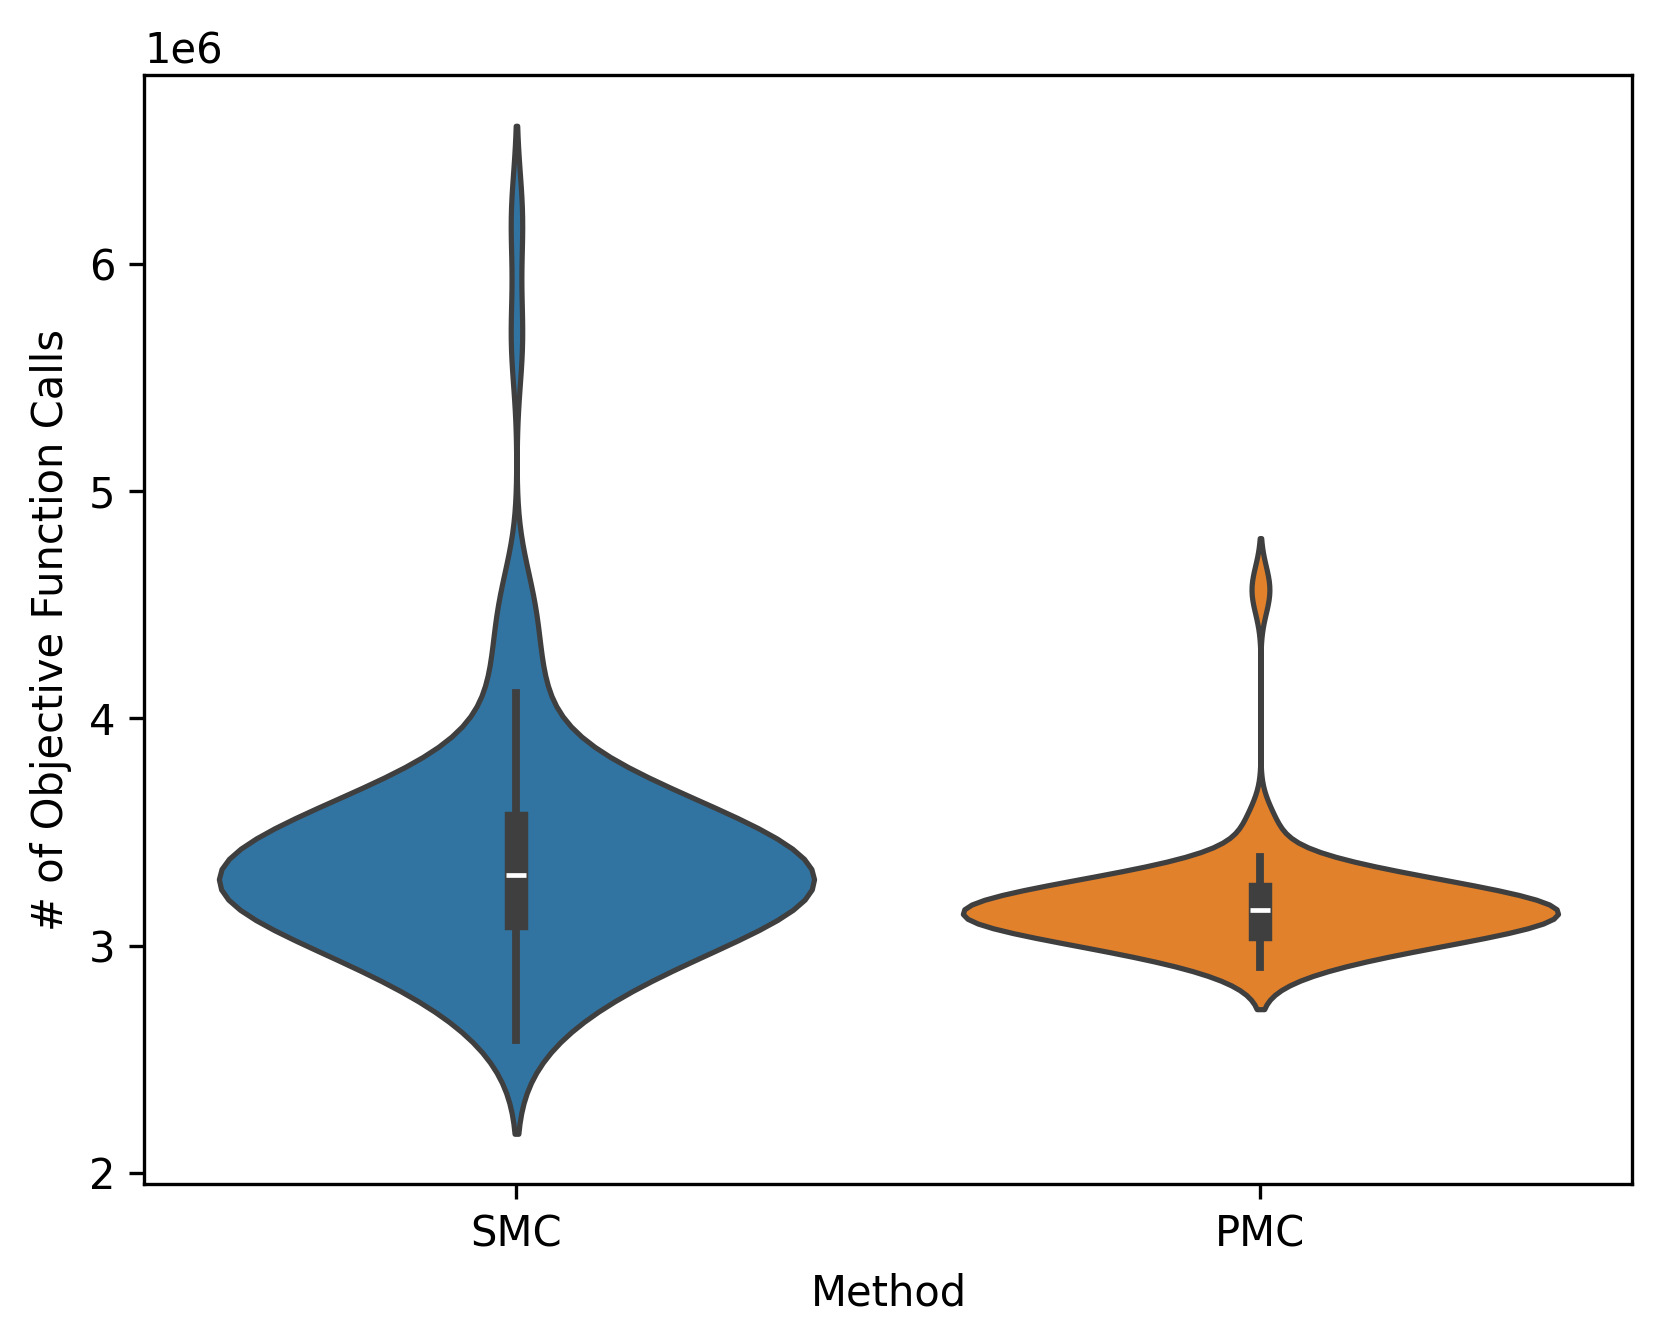

In [4]:
plt.figure(dpi=300)
calls = np.array([x.get_fun_calls() for x in grouped_results])
call_df = pd.DataFrame(columns=methods, data=calls.T)
sns.violinplot(call_df)
plt.xticks(range(len(methods)), [x.abbr for x in grouped_results])
plt.xlabel("Method"); plt.ylabel("# of Objective Function Calls");
print(f"MAX NUM FUNC CALLS: {np.max(calls)}")

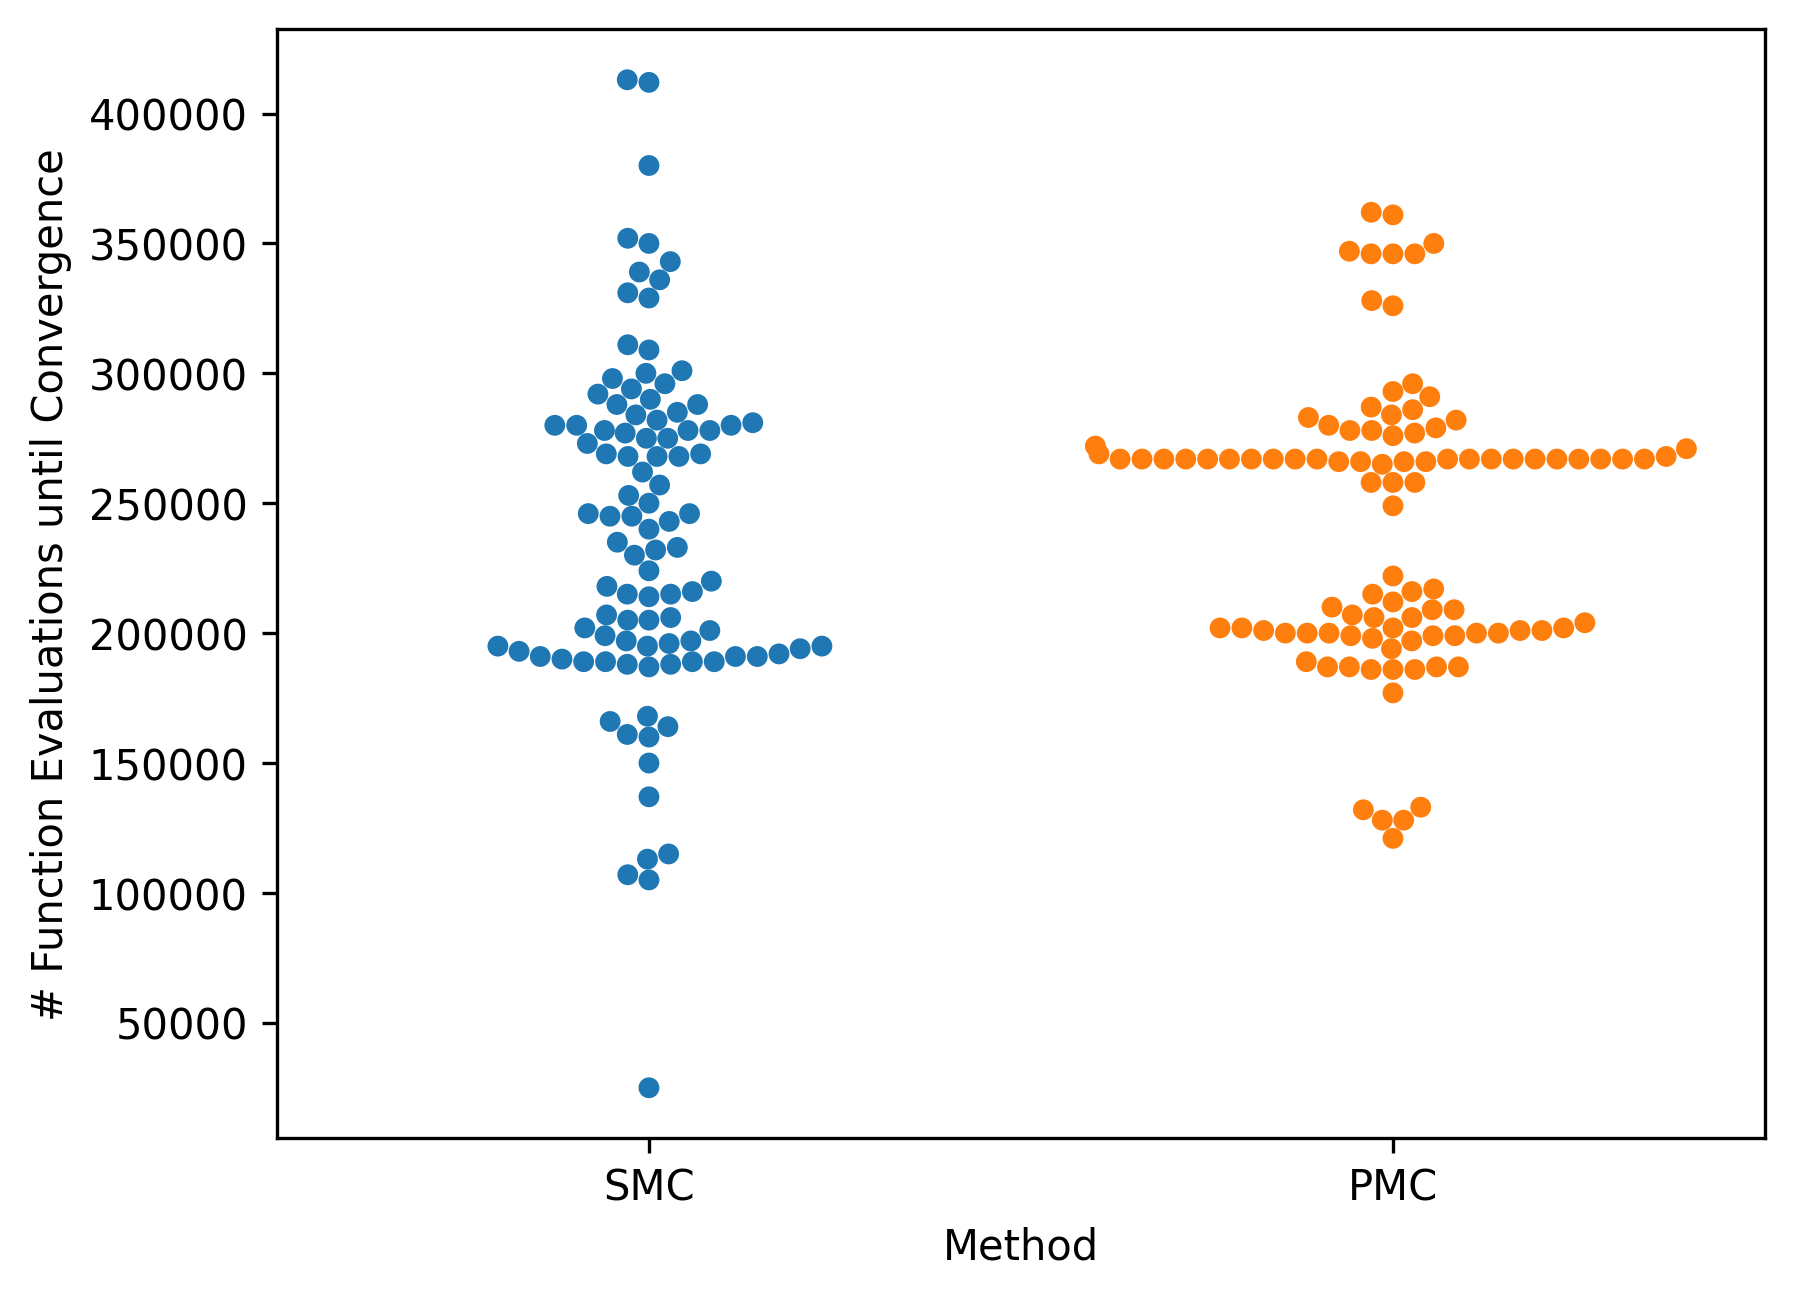

In [5]:
llh_threshold = -1000000
plt.figure(dpi=300)
#grouped_results[0].get_convergence_times(llh_threshold)
conv = np.array([x.get_convergence_times(llh_threshold) for x in grouped_results])
conv_df = pd.DataFrame(columns=methods, data=conv.T)

sns.swarmplot(conv_df)
plt.xticks(range(len(methods)), [x.abbr for x in grouped_results])
plt.xlabel("Method"); 
plt.ylabel(f"# Function Evaluations until Convergence");